# Acquiring the data

In [70]:
# Running first cell for *weekly* "Search Trends" dataset collection, cleaning, and partial display

import pandas as pd
url = 'https://raw.githubusercontent.com/google-research/open-covid-19-data/master/data/exports/search_trends_symptoms_dataset/United%20States%20of%20America/2020_US_weekly_symptoms_dataset.csv'
df1 = pd.read_csv(url,index_col=0,parse_dates=[0])
# Find the columns where every value is null
empty_cols = [col for col in df1.columns if df1[col].isnull().all()]
# Drop these columns from the dataframe
df1.drop(empty_cols,
        axis=1,
        inplace=True)
df1['state_codes']=df1.index.str[3:]
#drop 'sub_region_1_code' column bc redundant
redundant = ['sub_region_1_code']
df1=df1.drop(columns=redundant)

# Delete rows which contains less than 30 non NaN values
#df1=df1.dropna(thresh=30)

df1['date']= pd.to_datetime(df1['date'])
#create multi-index constructed from date and open_covid_region_code
df1 = df1.set_index([df1.index,'date'])
print (df1.head(5))
print (df1.shape)

                                  country_region_code country_region  \
open_covid_region_code date                                            
US-AK                  2020-01-06  US                  United States   
                       2020-01-13  US                  United States   
                       2020-01-20  US                  United States   
                       2020-01-27  US                  United States   
                       2020-02-03  US                  United States   

                                  sub_region_1  symptom:Adrenal crisis  \
open_covid_region_code date                                              
US-AK                  2020-01-06  Alaska       12.69                    
                       2020-01-13  Alaska       9.56                     
                       2020-01-20  Alaska      NaN                       
                       2020-01-27  Alaska       15.31                    
                       2020-02-03  Alaska       8.8

In [71]:
# Running second cell for the *daily* "Search Trends" dataset collection, cleaning, and partial display
import pandas as pd
url = 'https://raw.githubusercontent.com/google-research/open-covid-19-data/master/data/exports/search_trends_symptoms_dataset/United%20States%20of%20America/2020_US_daily_symptoms_dataset.csv'
df_daily = pd.read_csv(url,index_col=0,parse_dates=[0])
# Find the columns where every value is null
empty_cols = [col for col in df_daily.columns if df_daily[col].isnull().all()]
# Drop these columns from the dataframe
df_daily.drop(empty_cols,
        axis=1,
        inplace=True)
df_daily['state_codes']=df_daily.index.str[3:]
#drop 'sub_region_1_code' column bc redundant
redundant = ['sub_region_1_code']
df_daily=df_daily.drop(columns=redundant)

# Delete rows which contains less than 390 non NaN values
df_daily=df_daily.dropna(thresh=390)

#convert date format and resample to weekly 
df_daily['date'] = pd.to_datetime(df_daily['date']) 
df_daily=df_daily.set_index('date').groupby([df_daily.index, 'state_codes']).resample('W', label='left', loffset=pd.DateOffset(days=1)).sum().fillna(0).reset_index().set_index('open_covid_region_code')
#create multi-index constructed from date and open_covid_region_code
df_daily = df_daily.set_index([df_daily.index,'date'])
#print (df_daily.head(5))
print (df_daily.shape)



(1431, 423)


In [72]:
# Running third cell for "COVID Hospitalization Cases" dataset collection, cleaning, and partial display

import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
url = 'https://raw.githubusercontent.com/google-research/open-covid-19-data/master/data/exports/cc_by/aggregated_cc_by.csv'
df2 = pd.read_csv(url,index_col=0,parse_dates=[0])
#replace 0 values with null
df2 = df2.replace({0.0:np.nan})
#get rid of irrelevant features
relevant_col = ['region_name', 'date', 'hospitalized_new']
df2=df2[relevant_col]
# Delete rows which have no value for hospitalized_new
df2=df2.dropna(subset = ['hospitalized_new'])
#convert date format and resample to weekly
df2['date'] = pd.to_datetime(df2['date'])
df2=df2.set_index('date').groupby([df2.index, 'region_name']).resample('W', label='left', loffset=pd.DateOffset(days=1)).sum().fillna(0).reset_index().set_index('open_covid_region_code')
#create multi-index constructed from open_covid_region_code and 'date'
df2 = df2.set_index([df2.index, 'date'])
print (df2.head(10))
print (df2.shape)

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.



                                   region_name  hospitalized_new
open_covid_region_code date                                     
CHE                    2020-02-24  Switzerland  49.0            
                       2020-03-02  Switzerland  106.0           
                       2020-03-09  Switzerland  339.0           
                       2020-03-16  Switzerland  819.0           
                       2020-03-23  Switzerland  1147.0          
                       2020-03-30  Switzerland  630.0           
                       2020-04-06  Switzerland  340.0           
                       2020-04-13  Switzerland  212.0           
                       2020-04-20  Switzerland  97.0            
                       2020-04-27  Switzerland  59.0            
(4483, 2)


In [73]:
# Running fourth cell for merging the weekly symptoms and hospitalization datasets. One dataframe object for visualization and one for machine learning algorithms.
# Both dataframes objects are shown partially.

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
inner_df = pd.merge(df1, df2, left_index=True, right_index=True)
#inner_df contains only points that have data for both symptoms and hospitalizations
left_df = pd.merge(df1, df2, left_index=True, right_index=True, how='left')
#left_df contains all rows in df1, even if hospitalized_new value is null
print (left_df.head(5))
print(left_df.shape)
print (inner_df.head(5))
print (inner_df.shape)
left_df.to_csv('out.csv')


                                  country_region_code country_region  \
open_covid_region_code date                                            
US-AK                  2020-01-06  US                  United States   
                       2020-01-13  US                  United States   
                       2020-01-20  US                  United States   
                       2020-01-27  US                  United States   
                       2020-02-03  US                  United States   

                                  sub_region_1  symptom:Adrenal crisis  \
open_covid_region_code date                                              
US-AK                  2020-01-06  Alaska       12.69                    
                       2020-01-13  Alaska       9.56                     
                       2020-01-20  Alaska      NaN                       
                       2020-01-27  Alaska       15.31                    
                       2020-02-03  Alaska       8.8

                       2020-04-20  AK          Alaska     -36.0              
(310, 127)


In [74]:
# Running fifth cell for merging the daily symptoms and hospitalization datasets. One dataframe object for visualization and one for machine learning algorithms.
# Both dataframes objects are shown partially.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

#inner_df2 contains only points that have data for both symptoms and hospitalizations
inner_df2 = pd.merge(df_daily, df2, left_index=True, right_index=True)

#left_df2 contains all rows in df_daily, even if hospitalized_new value is null
left_df2 = pd.merge(df_daily, df2, left_index=True, right_index=True, how='left')

print (left_df2.head(5))
print(left_df2.shape)
print (inner_df2.head(5))
print (inner_df2.shape)
left_df2.to_csv('out2.csv')


                                  state_codes  symptom:Abdominal obesity  \
open_covid_region_code date                                                
US-AL                  2019-12-30  AL          13.29                       
                       2020-01-06  AL          17.97                       
                       2020-01-13  AL          18.40                       
                       2020-01-20  AL          17.88                       
                       2020-01-27  AL          17.06                       

                                   symptom:Abdominal pain  symptom:Acne  \
open_covid_region_code date                                               
US-AL                  2019-12-30  25.75                   45.98          
                       2020-01-06  33.66                   59.62          
                       2020-01-13  33.72                   58.41          
                       2020-01-20  33.87                   61.95          
                 

                                  state_codes  symptom:Abdominal obesity  \
open_covid_region_code date                                                
US-AL                  2020-03-30  AL          16.81                       
                       2020-04-06  AL          19.12                       
                       2020-04-13  AL          20.50                       
                       2020-04-20  AL          21.72                       
                       2020-04-27  AL          21.28                       

                                   symptom:Abdominal pain  symptom:Acne  \
open_covid_region_code date                                               
US-AL                  2020-03-30  29.12                   67.74          
                       2020-04-06  29.69                   62.40          
                       2020-04-13  28.94                   67.38          
                       2020-04-20  30.75                   66.96          
                 

<b>Part 2: Visualization</b>

First, we visualize the data from the weekly symptoms dataset, which did not provide great results in comparison to the daily symptoms dataset

In [75]:
#visualization of weekly dataset
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
df = pd.read_csv('out.csv')
df=df.dropna(axis=1, thresh=100)
#keep only sympoms with highest mean search frequency
means = df.mean()
most_pop = [ind for m,ind in zip(means,means.index) if m>17]
state_codes = df['state_codes']
date = df['date']
open_covid_region_code = df['open_covid_region_code']
df = df[most_pop]
df['state_codes']= state_codes
df['open_covid_region_code'] = open_covid_region_code
df['date'] = date
df['date_by_week'] = date
df = df.set_index(['open_covid_region_code', 'date']) 
fig = px.choropleth(df, locations=df['state_codes'],
                    color=df['symptom:Developmental disability'],
                    hover_name=df['symptom:Developmental disability'],
                    locationmode = 'USA-states',
                    animation_frame=df['date_by_week'],
                    title = "Symptom Google Search Frequency in USA",
                    scope = "usa",
                    color_continuous_scale=px.colors.sequential.PuRd)
fig["layout"].pop("updatemenus")

fig = px.choropleth(df, locations=df['state_codes'],
                    color=df['symptom:Photodermatitis'],
                    hover_name=df['symptom:Photodermatitis'],
                    locationmode = 'USA-states',
                    animation_frame=df['date_by_week'],
                    title = "'Photodermatitis' Google Search Frequency in USA",
                    scope = "usa",
                   color_continuous_scale=px.colors.sequential.PuRd)
fig["layout"].pop("updatemenus")

fig2 = px.choropleth(df, locations=df['state_codes'],
                    color=df['symptom:Croup'],
                    hover_name=df['symptom:Croup'],
                    locationmode = 'USA-states',
                    animation_frame=df['date_by_week'],
                    title = "'Croup' Google Search Frequency in USA",
                    scope = "usa",
                   color_continuous_scale=px.colors.sequential.PuRd)
fig2["layout"].pop("updatemenus")

fig3 = px.choropleth(df, locations=df['state_codes'],
                    color=df['symptom:Developmental disability'],
                    hover_name=df['symptom:Developmental disability'],
                    locationmode = 'USA-states',
                    animation_frame=df['date_by_week'],
                    title = "'Developmental Disability' Google Search Frequency in USA",
                    scope = "usa",
                   color_continuous_scale=px.colors.sequential.PuRd)
fig3["layout"].pop("updatemenus")


fig.show()
fig2.show()
fig3.show()


Next, we visualize data from the daily symptoms dataset, which yielded much better results

In [76]:
#visualization of weekly dataset
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
df = pd.read_csv('out2.csv')
#keep only sympoms with highest mean search frequency
means = df.mean()
most_pop = [ind for m,ind in zip(means,means.index) if m>60]
state_codes = df['state_codes']
date = df['date']
open_covid_region_code = df['open_covid_region_code']
df = df[most_pop]
df['state_codes']= state_codes
df['open_covid_region_code'] = open_covid_region_code
df['date'] = date
df['date_by_week'] = date
df = df.set_index(['open_covid_region_code', 'date']) 

fig = px.choropleth(df, locations=df['state_codes'],
                    color=df['symptom:Allergy'],
                    hover_name=df['symptom:Allergy'],
                    locationmode = 'USA-states',
                    animation_frame=df['date_by_week'],
                    title = "'Allergy' Google Search Frequency in USA",
                    scope = "usa",
                   color_continuous_scale=px.colors.sequential.PuRd)
fig["layout"].pop("updatemenus")

fig2 = px.choropleth(df, locations=df['state_codes'],
                    color=df['symptom:Common cold'],
                    hover_name=df['symptom:Common cold'],
                    locationmode = 'USA-states',
                    animation_frame=df['date_by_week'],
                    title = "'Common Cold' Google Search Frequency in USA",
                    scope = "usa",
                   color_continuous_scale=px.colors.sequential.PuRd)
fig2["layout"].pop("updatemenus")

fig3 = px.choropleth(df, locations=df['state_codes'],
                    color=df['symptom:Infection'],
                    hover_name=df['symptom:Infection'],
                    locationmode = 'USA-states',
                    animation_frame=df['date_by_week'],
                    title = "'Infection' Google Search Frequency in USA",
                    scope = "usa",
                   color_continuous_scale=px.colors.sequential.PuRd)
fig3["layout"].pop("updatemenus")

fig4 = px.choropleth(df, locations=df['state_codes'],
                    color=df['symptom:Pain'],
                    hover_name=df['symptom:Pain'],
                    locationmode = 'USA-states',
                    animation_frame=df['date_by_week'],
                    title = "'Pain' Google Search Frequency in USA",
                    scope = "usa",
                   color_continuous_scale=px.colors.sequential.PuRd)
fig4["layout"].pop("updatemenus")
fig.show()
fig2.show()
fig3.show()
fig4.show()


# Processing the data

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
left_df.describe()
left_df.head()

country_region_code country_region  \
open_covid_region_code date                                            
US-AK                  2020-01-06  US                  United States   
                       2020-01-13  US                  United States   
                       2020-01-20  US                  United States   
                       2020-01-27  US                  United States   
                       2020-02-03  US                  United States   

                                  sub_region_1  symptom:Adrenal crisis  \
open_covid_region_code date                                              
US-AK                  2020-01-06  Alaska       12.69                    
                       2020-01-13  Alaska       9.56                     
                       2020-01-20  Alaska      NaN                       
                       2020-01-27  Alaska       15.31                    
                       2020-02-03  Alaska       8.81                     

                                   symptom:Ageusia  \
open_covid_region_code date                          
US-AK                  2020-01-06 NaN                
                       2020-01-13 NaN                
                       2020-01-20 NaN                
                       2020-01-27  7.47              
                       2020-02-03 NaN                

                                   symptom:Allergic conjunctivitis  \
open_covid_region_code date                                          
US-AK                  2020-01-06 NaN                                
                       2020-01-13 NaN                                
                       2020-01-20 NaN                                
                       2020-01-27 NaN                                
                       2020-02-03 NaN                                

                                   symptom:Amblyopia  symptom:Amenorrhea  \
open_covid_region_code date                                                
US-AK                  2020-01-06 NaN                 12.29                
                       2020-01-13 NaN                 12.62                
                       2020-01-20 NaN                 14.17                
                       2020-01-27 NaN                 15.67                
                       2020-02-03 NaN                 13.87                

                                   symptom:Angular cheilitis  symptom:Anosmia  \
open_covid_region_code date                                                     
US-AK                  2020-01-06 NaN                        NaN                
                       2020-01-13 NaN                        NaN                
                       2020-01-20 NaN                         7.36              
                       2020-01-27  7.47                      NaN                
                       2020-02-03  8.06                      NaN                

                                   symptom:Aphonia  symptom:Ascites  \
open_covid_region_code date                                           
US-AK                  2020-01-06 NaN              NaN                
                       2020-01-13 NaN              NaN                
                       2020-01-20 NaN              NaN                
                       2020-01-27  7.65            NaN                
                       2020-02-03  12.56           NaN                

                                   symptom:Asphyxia  symptom:Atheroma  \
open_covid_region_code date                                             
US-AK                  2020-01-06  10.31             11.10              
                       2020-01-13  13.20             13.20              
                       2020-01-20  14.90             10.49              
                       2020-01-27  12.03             11.84              
                       2020-02-03  14.24             9.75               

                             

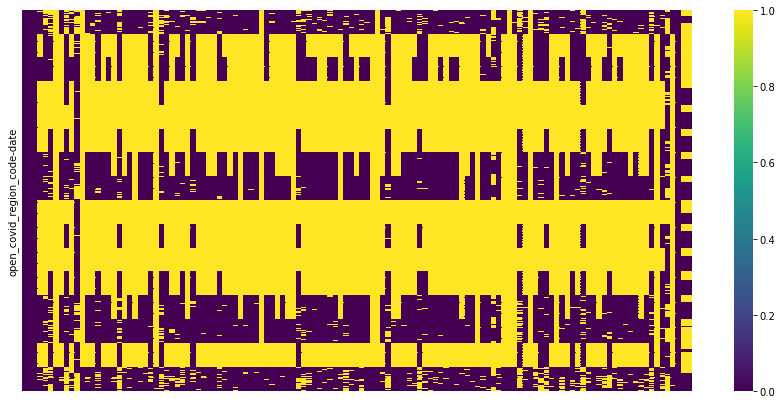

In [78]:
plt.figure(figsize = (15,7))
sns.heatmap(data = left_df.isnull(),xticklabels = False, yticklabels = False, cmap = 'viridis')

In [79]:
inner_df.head(5)

country_region_code country_region  \
open_covid_region_code date                                            
US-AK                  2020-03-23  US                  United States   
                       2020-03-30  US                  United States   
                       2020-04-06  US                  United States   
                       2020-04-13  US                  United States   
                       2020-04-20  US                  United States   

                                  sub_region_1  symptom:Adrenal crisis  \
open_covid_region_code date                                              
US-AK                  2020-03-23  Alaska       11.15                    
                       2020-03-30  Alaska       8.96                     
                       2020-04-06  Alaska       10.08                    
                       2020-04-13  Alaska       6.24                     
                       2020-04-20  Alaska       7.40                     

                                   symptom:Ageusia  \
open_covid_region_code date                          
US-AK                  2020-03-23  16.57             
                       2020-03-30  8.96              
                       2020-04-06  7.35              
                       2020-04-13 NaN                
                       2020-04-20 NaN                

                                   symptom:Allergic conjunctivitis  \
open_covid_region_code date                                          
US-AK                  2020-03-23 NaN                                
                       2020-03-30  7.11                              
                       2020-04-06 NaN                                
                       2020-04-13 NaN                                
                       2020-04-20  6.24                              

                                   symptom:Amblyopia  symptom:Amenorrhea  \
open_covid_region_code date                                                
US-AK                  2020-03-23 NaN                 9.53                 
                       2020-03-30 NaN                 8.53                 
                       2020-04-06 NaN                 10.80                
                       2020-04-13 NaN                 7.94                 
                       2020-04-20 NaN                 11.90                

                                   symptom:Angular cheilitis  symptom:Anosmia  \
open_covid_region_code date                                                     
US-AK                  2020-03-23 NaN                         45.17             
                       2020-03-30 NaN                         19.05             
                       2020-04-06  7.06                       6.77              
                       2020-04-13  6.52                       10.64             
                       2020-04-20 NaN                        NaN                

                                   symptom:Aphonia  symptom:Ascites  \
open_covid_region_code date                                           
US-AK                  2020-03-23 NaN              NaN                
                       2020-03-30 NaN              NaN                
                       2020-04-06 NaN              NaN                
                       2020-04-13 NaN              NaN                
                       2020-04-20 NaN              NaN                

                                   symptom:Asphyxia  symptom:Atheroma  \
open_covid_region_code date                                             
US-AK                  2020-03-23  9.39              11.44              
                       2020-03-30  11.94             7.54               
                       2020-04-06  9.65              11.52              
                       2020-04-13  10.50             8.65               
                       2020-04-20  9.14              13.06              

                             

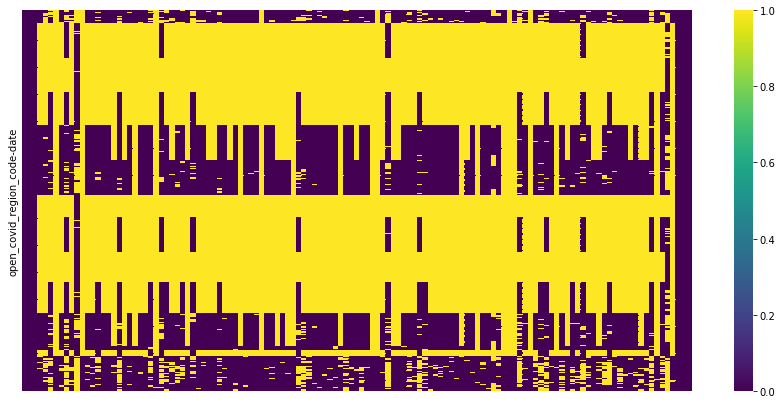

In [80]:
plt.figure(figsize = (15,7))
sns.heatmap(data = inner_df.isnull(),xticklabels = False, yticklabels = False, cmap = 'viridis')

# The takeaway is that when we take data only corresponding to the regions AND specific weeks for hospitalization cases, there
# are less NA values (less yellow)

It can be seen that even in inner_df, there are MANY NA values. For proper machine learning algorithms, 
it is important that this dataframe must be mostly complete. 

So, we apply PCA to reduce the number of features. 

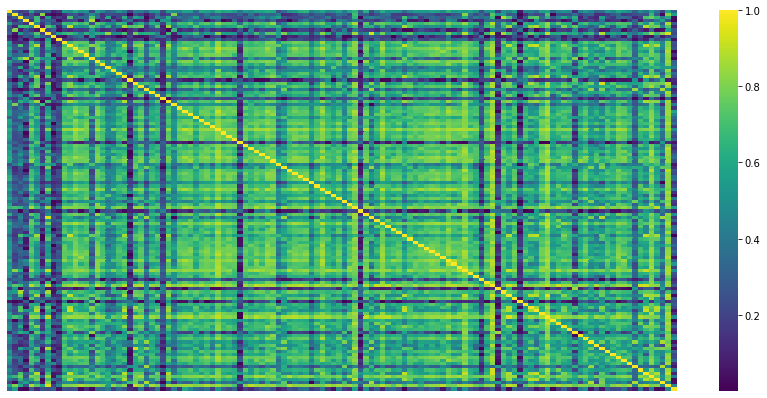

In [81]:
plt.figure(figsize=(15,7))
#sns.heatmap(df1.corr().abs(),xticklabels = False, yticklabels = False, cmap = 'viridis')
sns.heatmap(left_df.corr().abs(),xticklabels = False, yticklabels = False, cmap = 'viridis')

In [82]:
# Now we will drop region_name (redundant), country_region_code, sub_region_1, state_codes, and country_region
left_df.drop(['country_region_code','country_region','sub_region_1','state_codes','region_name'],axis=1,inplace=True)

(624, 122)


symptom:Adrenal crisis  symptom:Ageusia  \
open_covid_region_code date                                                  
US-AK                  2020-01-06  12.69                  NaN                
                       2020-01-13  9.56                   NaN                
                       2020-01-20 NaN                     NaN                
                       2020-01-27  15.31                   7.47              
                       2020-02-03  8.81                   NaN                

                                   symptom:Allergic conjunctivitis  \
open_covid_region_code date                                          
US-AK                  2020-01-06 NaN                                
                       2020-01-13 NaN                                
                       2020-01-20 NaN                                
                       2020-01-27 NaN                                
                       2020-02-03 NaN                                

                                   symptom:Amblyopia  symptom:Amenorrhea  \
open_covid_region_code date                                                
US-AK                  2020-01-06 NaN                 12.29                
                       2020-01-13 NaN                 12.62                
                       2020-01-20 NaN                 14.17                
                       2020-01-27 NaN                 15.67                
                       2020-02-03 NaN                 13.87                

                                   symptom:Angular cheilitis  symptom:Anosmia  \
open_covid_region_code date                                                     
US-AK                  2020-01-06 NaN                        NaN                
                       2020-01-13 NaN                        NaN                
                       2020-01-20 NaN                         7.36              
                       2020-01-27  7.47                      NaN                
                       2020-02-03  8.06                      NaN                

                                   symptom:Aphonia  symptom:Ascites  \
open_covid_region_code date                                           
US-AK                  2020-01-06 NaN              NaN                
                       2020-01-13 NaN              NaN                
                       2020-01-20 NaN              NaN                
                       2020-01-27  7.65            NaN                
                       2020-02-03  12.56           NaN                

                                   symptom:Asphyxia  symptom:Atheroma  \
open_covid_region_code date                                             
US-AK                  2020-01-06  10.31             11.10              
                       2020-01-13  13.20             13.20              
                       2020-01-20  14.90             10.49              
                       2020-01-27  12.03             11.84              
                       2020-02-03  14.24             9.75               

                                   symptom:Auditory hallucination  \
open_covid_region_code date                                         
US-AK                  2020-01-06  8.92                             
                       2020-01-13  8.61                             
                       2020-01-20  8.28                             
                       2020-01-27  13.12                            
                       2020-02-03  8.81                             

                                   symptom:Balance disorder  \
open_covid_region_code date                                   
US-AK                  2020-01-06  11.10                      
                       2020-01-13  10.90                      
                       2020-01-20  11.78                      
                       2020-01-27 NaN                         
                       2

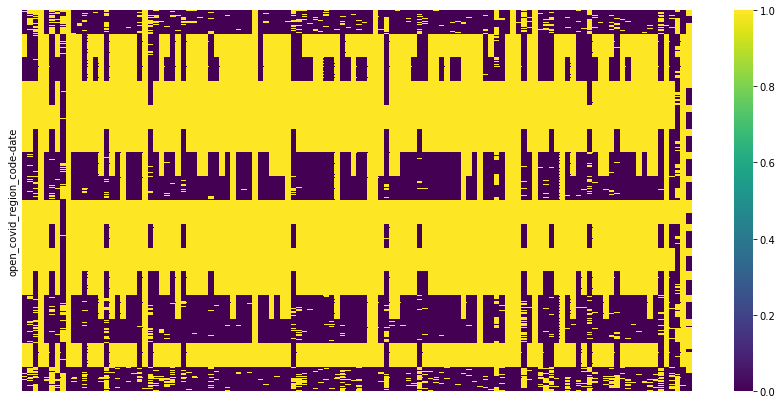

In [83]:
plt.figure(figsize=(15,7))
sns.heatmap(data = left_df.isnull(),xticklabels = False, yticklabels = False, cmap = 'viridis')
print(left_df.shape)
left_df.head()

In [84]:
# Now to apply PCA, we need to a "full" dataframe. We either need to remove NA values or fill them in.
# With rows/samples missing atleast 50% of its data, they are straight away removed.

left_df = left_df[left_df.isnull().mean(axis=1)<0.50]

# Removed 390 samples from 624 to 234
left_df.shape

(234, 122)

In [85]:
left_df.head()

symptom:Adrenal crisis  symptom:Ageusia  \
open_covid_region_code date                                                  
US-AK                  2020-01-06  12.69                  NaN                
                       2020-01-13  9.56                   NaN                
                       2020-01-20 NaN                     NaN                
                       2020-01-27  15.31                   7.47              
                       2020-02-03  8.81                   NaN                

                                   symptom:Allergic conjunctivitis  \
open_covid_region_code date                                          
US-AK                  2020-01-06 NaN                                
                       2020-01-13 NaN                                
                       2020-01-20 NaN                                
                       2020-01-27 NaN                                
                       2020-02-03 NaN                                

                                   symptom:Amblyopia  symptom:Amenorrhea  \
open_covid_region_code date                                                
US-AK                  2020-01-06 NaN                 12.29                
                       2020-01-13 NaN                 12.62                
                       2020-01-20 NaN                 14.17                
                       2020-01-27 NaN                 15.67                
                       2020-02-03 NaN                 13.87                

                                   symptom:Angular cheilitis  symptom:Anosmia  \
open_covid_region_code date                                                     
US-AK                  2020-01-06 NaN                        NaN                
                       2020-01-13 NaN                        NaN                
                       2020-01-20 NaN                         7.36              
                       2020-01-27  7.47                      NaN                
                       2020-02-03  8.06                      NaN                

                                   symptom:Aphonia  symptom:Ascites  \
open_covid_region_code date                                           
US-AK                  2020-01-06 NaN              NaN                
                       2020-01-13 NaN              NaN                
                       2020-01-20 NaN              NaN                
                       2020-01-27  7.65            NaN                
                       2020-02-03  12.56           NaN                

                                   symptom:Asphyxia  symptom:Atheroma  \
open_covid_region_code date                                             
US-AK                  2020-01-06  10.31             11.10              
                       2020-01-13  13.20             13.20              
                       2020-01-20  14.90             10.49              
                       2020-01-27  12.03             11.84              
                       2020-02-03  14.24             9.75               

                                   symptom:Auditory hallucination  \
open_covid_region_code date                                         
US-AK                  2020-01-06  8.92                             
                       2020-01-13  8.61                             
                       2020-01-20  8.28                             
                       2020-01-27  13.12                            
                       2020-02-03  8.81                             

                                   symptom:Balance disorder  \
open_covid_region_code date                                   
US-AK                  2020-01-06  11.10                      
                       2020-01-13  10.90                      
                       2020-01-20  11.78                      
                       2020-01-27 NaN                         
                       2

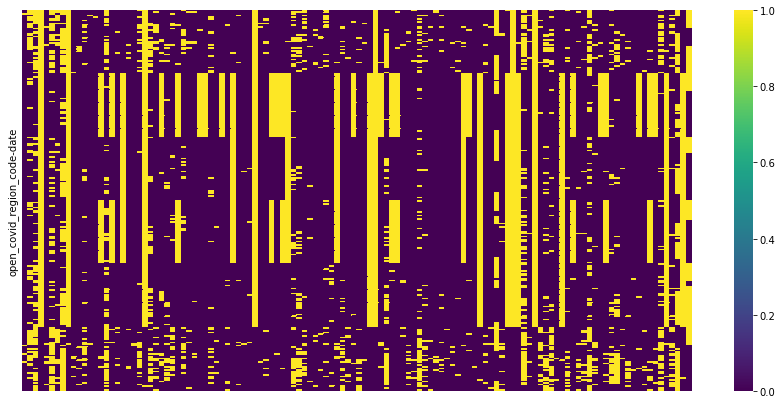

In [86]:
plt.figure(figsize = (15,7))
sns.heatmap(data = left_df.isnull(),xticklabels = False, yticklabels = False, cmap = 'viridis')
# It is very clear that for a few range of columns, a huge chunk of data is missing. So those features are removed.

In [87]:
# With features missing atleast 25% of its data, they are straight away removed.

# Removed 42 more features (from 122 to 80) excluding the hospitalized_new target value
target = left_df['hospitalized_new']
left_df = left_df[left_df.drop('hospitalized_new',axis=1).columns[left_df.drop('hospitalized_new',axis=1).isnull().mean() < 0.25]]
left_df = pd.concat([left_df,target],axis=1)
left_df.shape

(234, 80)

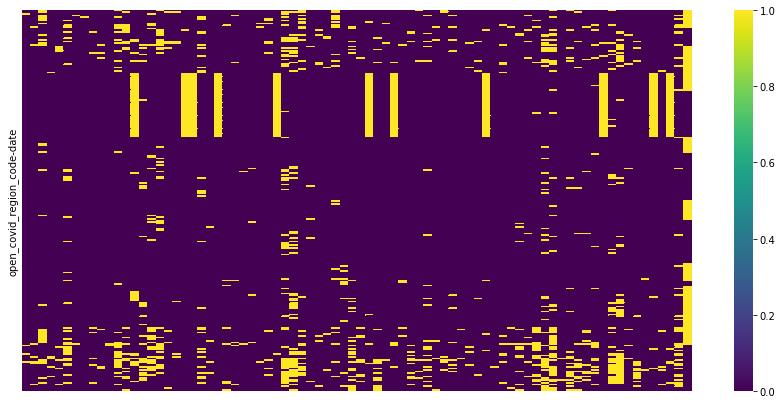

In [88]:
plt.figure(figsize = (15,7))
sns.heatmap(data = left_df.isnull(),xticklabels = False, yticklabels = False, cmap = 'viridis')

This heatmap is much better than before. We could afford to remove the features as there were too many for the number 
of training samples. The samples have also decreased, but not by too much. The rest of the data can be 'imputed'. Imputation is 
thought to be best done by correlating it with other features with high correlations and 'drawing' data from that.

Random imputations are not thought to be best, because the authors of this project have are not physicians and they cannot draw
conclusions from the features/symptoms. The authors do not know if  "mean imputations are best" or "weighted mean imputations are best" or "random imputations with probability disributions are best". It's best to correlate and find impute values on those correlated features.

In [89]:
left_df.head()

symptom:Adrenal crisis  symptom:Amenorrhea  \
open_covid_region_code date                                                     
US-AK                  2020-01-06  12.69                   12.29                
                       2020-01-13  9.56                    12.62                
                       2020-01-20 NaN                      14.17                
                       2020-01-27  15.31                   15.67                
                       2020-02-03  8.81                    13.87                

                                   symptom:Anosmia  symptom:Asphyxia  \
open_covid_region_code date                                            
US-AK                  2020-01-06 NaN               10.31              
                       2020-01-13 NaN               13.20              
                       2020-01-20  7.36             14.90              
                       2020-01-27 NaN               12.03              
                       2020-02-03 NaN               14.24              

                                   symptom:Atheroma  \
open_covid_region_code date                           
US-AK                  2020-01-06  11.10              
                       2020-01-13  13.20              
                       2020-01-20  10.49              
                       2020-01-27  11.84              
                       2020-02-03  9.75               

                                   symptom:Auditory hallucination  \
open_covid_region_code date                                         
US-AK                  2020-01-06  8.92                             
                       2020-01-13  8.61                             
                       2020-01-20  8.28                             
                       2020-01-27  13.12                            
                       2020-02-03  8.81                             

                                   symptom:Balance disorder  \
open_covid_region_code date                                   
US-AK                  2020-01-06  11.10                      
                       2020-01-13  10.90                      
                       2020-01-20  11.78                      
                       2020-01-27 NaN                         
                       2020-02-03  13.12                      

                                   symptom:Beau's lines  symptom:Cataplexy  \
open_covid_region_code date                                                  
US-AK                  2020-01-06  7.93                  12.29               
                       2020-01-13  11.86                 14.92               
                       2020-01-20  11.96                 11.04               
                       2020-01-27  12.03                 13.85               
                       2020-02-03 NaN                    14.24               

                                   symptom:Chorea  \
open_covid_region_code date                         
US-AK                  2020-01-06  12.10            
                       2020-01-13  11.47            
                       2020-01-20  11.59            
                       2020-01-27  12.94            
                       2020-02-03  15.37            

                                   symptom:Cleft lip and cleft palate  \
open_covid_region_code date                                             
US-AK                  2020-01-06  18.05                                
                       2020-01-13  34.81                                
                       2020-01-20  19.14                                
                       2020-01-27  15.49                                
                       2020-02-03  13.12                                

                                   symptom:Clouding of consciousness  \
open_covid_region_code date                                            
US-AK                  2020-01-06 NaN                                  
   

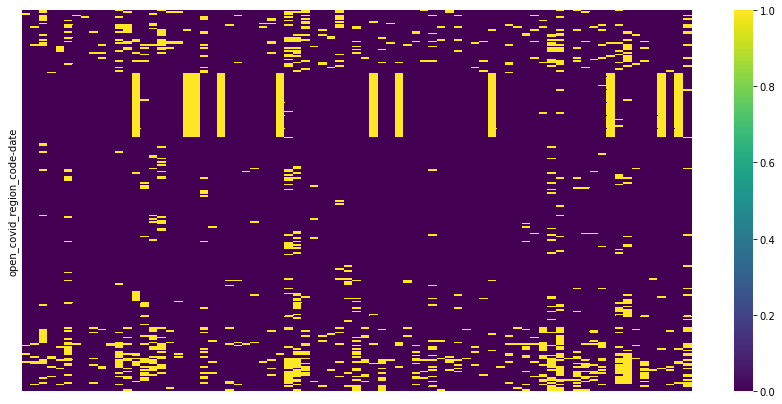

In [90]:
# Now let's build a df just for PCA!
pca_df = left_df.drop('hospitalized_new',axis=1)
plt.figure(figsize = (15,7))
sns.heatmap(data = pca_df.isnull(),xticklabels = False, yticklabels = False, cmap = 'viridis')

In [91]:
stateindex = pca_df.index.levels[0]
pca_df.loc[stateindex[0]].median().median()

9.92

In [92]:
# Now we need to combine values across regions! We need to normalize this by a baseline value.
# So we get the median of every symptom in a region. And then we take the median across all the symptoms for that region.
# We divide all values in that region by this "overall state symptom median"

# This way we test variability in a way that you can combine over different regions

stateindex = pca_df.index.levels[0]
frames = []

for i in range(len(stateindex)):
    
    try:
        medians = pca_df.loc[stateindex[i]].median().median()
        framesdf = (pca_df.loc[stateindex[i]]-medians)/medians
        framesdf['open_covid_region_code'] = stateindex[i]
        framesdf = framesdf.set_index(['open_covid_region_code',framesdf.index])
        frames.append(framesdf)
        
    except:
        pass
    
pca_df = pd.concat(frames)

In [93]:
pca_df.head()

symptom:Adrenal crisis  symptom:Amenorrhea  \
open_covid_region_code date                                                     
US-AK                  2020-01-06  0.279234                0.238911             
                       2020-01-13 -0.036290                0.272177             
                       2020-01-20 NaN                      0.428427             
                       2020-01-27  0.543347                0.579637             
                       2020-02-03 -0.111895                0.398185             

                                   symptom:Anosmia  symptom:Asphyxia  \
open_covid_region_code date                                            
US-AK                  2020-01-06 NaN               0.039315           
                       2020-01-13 NaN               0.330645           
                       2020-01-20 -0.258065         0.502016           
                       2020-01-27 NaN               0.212702           
                       2020-02-03 NaN               0.435484           

                                   symptom:Atheroma  \
open_covid_region_code date                           
US-AK                  2020-01-06  0.118952           
                       2020-01-13  0.330645           
                       2020-01-20  0.057460           
                       2020-01-27  0.193548           
                       2020-02-03 -0.017137           

                                   symptom:Auditory hallucination  \
open_covid_region_code date                                         
US-AK                  2020-01-06 -0.100806                         
                       2020-01-13 -0.132056                         
                       2020-01-20 -0.165323                         
                       2020-01-27  0.322581                         
                       2020-02-03 -0.111895                         

                                   symptom:Balance disorder  \
open_covid_region_code date                                   
US-AK                  2020-01-06  0.118952                   
                       2020-01-13  0.098790                   
                       2020-01-20  0.187500                   
                       2020-01-27 NaN                         
                       2020-02-03  0.322581                   

                                   symptom:Beau's lines  symptom:Cataplexy  \
open_covid_region_code date                                                  
US-AK                  2020-01-06 -0.200605              0.238911            
                       2020-01-13  0.195565              0.504032            
                       2020-01-20  0.205645              0.112903            
                       2020-01-27  0.212702              0.396169            
                       2020-02-03 NaN                    0.435484            

                                   symptom:Chorea  \
open_covid_region_code date                         
US-AK                  2020-01-06  0.219758         
                       2020-01-13  0.156250         
                       2020-01-20  0.168347         
                       2020-01-27  0.304435         
                       2020-02-03  0.549395         

                                   symptom:Cleft lip and cleft palate  \
open_covid_region_code date                                             
US-AK                  2020-01-06  0.819556                             
                       2020-01-13  2.509073                             
                       2020-01-20  0.929435                             
                       2020-01-27  0.561492                             
                       2020-02-03  0.322581                             

                                   symptom:Clouding of consciousness  \
open_covid_region_code date                                            
US-AK                  2020-01-06 NaN                                  
   

In [94]:
missingdatacols = pca_df.isnull().mean().sort_values(ascending=False) != 0
missingdatacols = missingdatacols[missingdatacols].index

In [95]:
# This function is used in the .apply method in the next cell
def impute_missingdata(cols):
    missingdatacols = cols[0]
    bestcorrcols = cols[1:].fillna(0)
    
    bestcorrcolsarr = np.array([bestcorrcols])
    coeff_dfarr = np.array(coeff_df)
   
    cleanup = bestcorrcolsarr@coeff_dfarr+lm.intercept_
    cleanup = list(cleanup)
    flat_list = [item for sublist in cleanup for item in sublist]
    
    if pd.isnull(missingdatacols):
        return flat_list[0]
    else:
        return missingdatacols

MAE: 0.6957391546620396
MSE: 0.7429411876208917
RMSE: 0.8619403619861943
                         Coefficient
symptom:Stridor          1.140884   
symptom:Hemoptysis       1.511222   
symptom:Tachypnea        0.452282   
symptom:Hypochondriasis  1.526817   
symptom:Splenomegaly     0.917434   
symptom:Rheum            1.147064   
1.3367505245024072


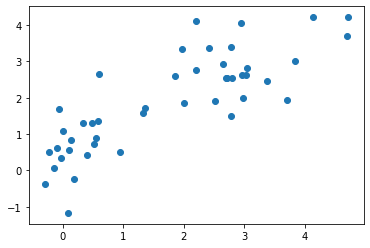

In [96]:
# First we obtain the 6 highest correlation features for features missing any data. Data filling occurs in most empty to least 
# empty order

# we then build out a linear regression dataframe to obtain and fill values for the current column.

for i in range(len(missingdatacols)):
    
    cols = pca_df.drop(missingdatacols[i],axis=1).corrwith(pca_df[missingdatacols[i]]).abs().sort_values().dropna()[-1:-7:-1].index
    lr_df = pd.concat([pca_df[cols],pca_df[missingdatacols[i]]],axis=1).dropna()
    # The linear regression dataframe necissitates that NA values are dropped
    X = lr_df[lr_df.columns[0:-1]]
    y = lr_df[lr_df.columns[-1]]
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
    from sklearn.linear_model import LinearRegression
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    predictions = lm.predict(X_test)
    
    coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
    
    if i == 0:
        # Showing in a plot that linear regression based on just 4 correlated features gives pretty decent correlation.
        # Filling up the data based on the output from this regression is therefore fine
        
        from sklearn import metrics
        print('MAE:', metrics.mean_absolute_error(y_test, predictions))
        print('MSE:', metrics.mean_squared_error(y_test, predictions))
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
        plt.scatter(y_test,predictions)
        
        # Also printing out the coefficient series and the intercept of the regression
        print(coeff_df)
        print(lm.intercept_)

    sampledf1 = pca_df[[missingdatacols[i]]]
    sampledf2 = pca_df[cols]
    
    # Applying the imputing method to fill empty NA points
    pca_df[missingdatacols[i]]=pd.concat([sampledf1,sampledf2],axis=1).apply(impute_missingdata,axis=1)

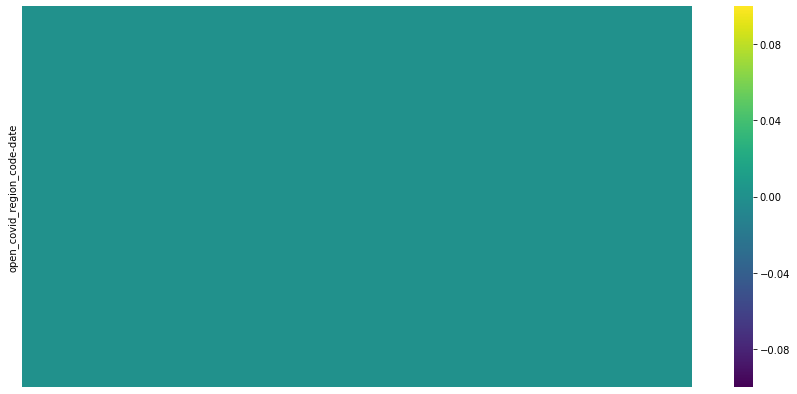

In [97]:
plt.figure(figsize = (15,7))
sns.heatmap(data = pca_df.isnull(),xticklabels = False, yticklabels = False, cmap = 'viridis')

# Applying PCA

Text(0.5, 1, 'Cumulative Variance Explained vs Principal Components')

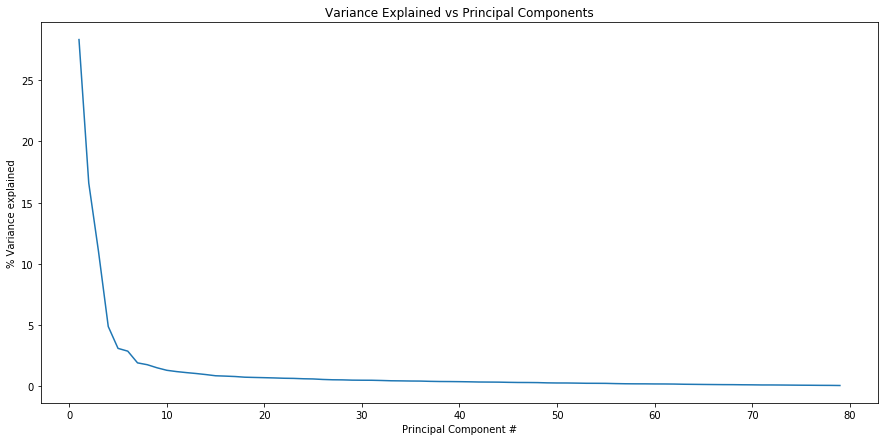

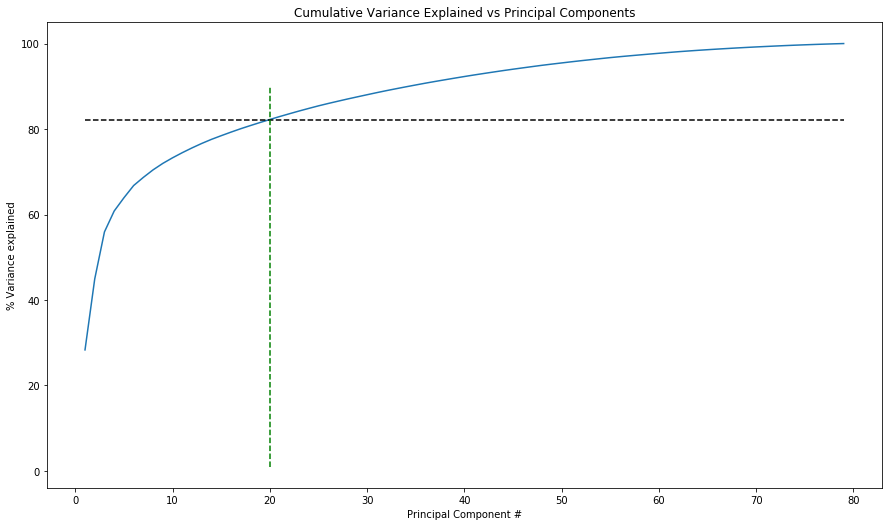

In [99]:
# Our features are fully filled for PCA analysis!

from sklearn.decomposition import PCA

X = pca_df

pca2 = PCA()
pca2.fit(X)
num_pc_components = len(pca2.explained_variance_ratio_)

plt.figure(figsize=(15,7))
plt.plot(np.linspace(1,num_pc_components,num_pc_components),100*pca2.explained_variance_ratio_)
plt.xlabel("Principal Component #")
plt.ylabel("% Variance explained")
plt.title("Variance Explained vs Principal Components")

plt.figure(figsize=(12.25,7))
plt.plot(np.linspace(1,num_pc_components,num_pc_components),100*np.cumsum(pca2.explained_variance_ratio_))
plt.tight_layout()

#testing 83% and 20
plt.plot(np.linspace(1,num_pc_components,num_pc_components),82*np.ones((num_pc_components,)),'k--')
plt.plot(20*np.ones((num_pc_components,)),np.linspace(1,90,num_pc_components),'g--')
plt.tight_layout()
plt.xlabel("Principal Component #")
plt.ylabel("% Variance explained")
plt.title("Cumulative Variance Explained vs Principal Components")


If PCA reduces the number of features to 20 (associated 82% variance explained), we have a decent dataset.
Quoting "For uncorrelated features, the optimal feature size is N−1 (where N is sample size)
As feature correlation increases, and the optimal feature size becomes proportional to sqrt(N) for highly correlated features."
We have 234 samples, where sqrt(240)=15.3. This is relatively close to 20 features from the PCA model.
If we break it down further below 20 features, we may loose out on details of our data.

Text(0, 0.5, 'Second Principal Component')

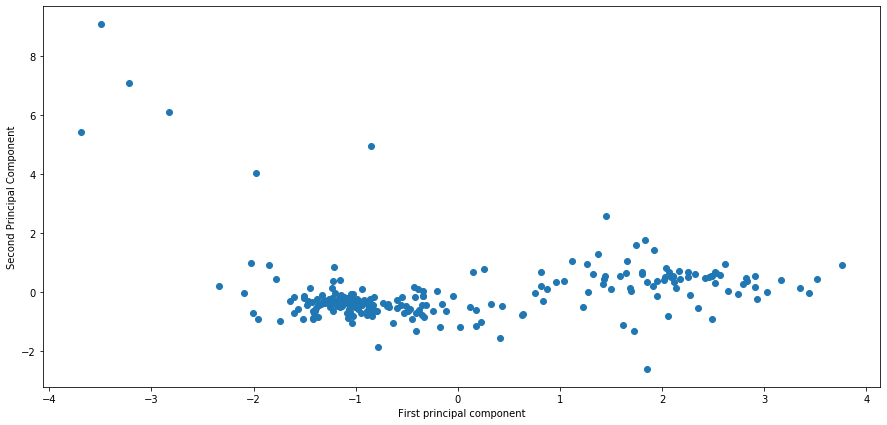

In [100]:
# For viewing purposes, we see the 2-d feature space below

X = pca_df

'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
'''

from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(15,7))
plt.scatter(X_reduced[:,0],X_reduced[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


# Clustering

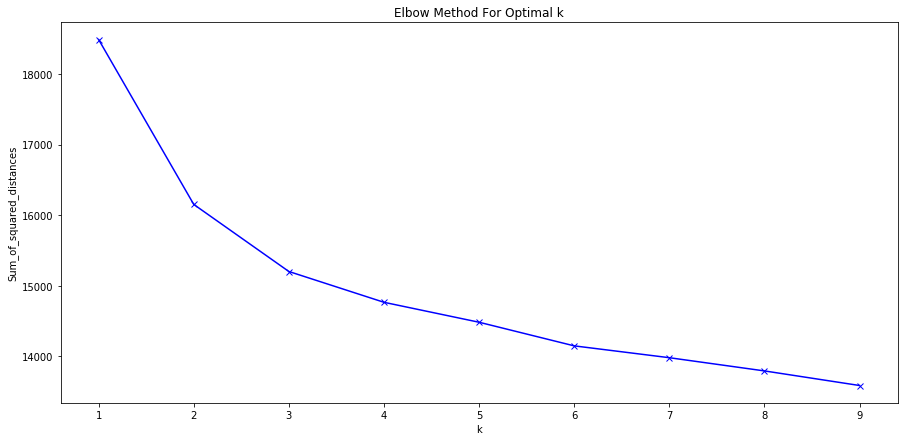

In [103]:
# Let us find optimal number of clusters!
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
upper_scaled_data = scaler.fit_transform(X)

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(upper_scaled_data)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.figure(figsize=(15,7))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Text(0.5, 1.0, 'Cluster labels for low-dimensional (20D) KMeans')

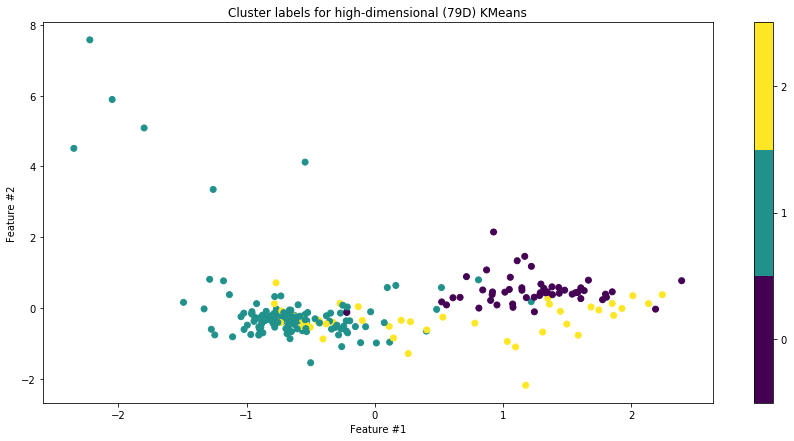

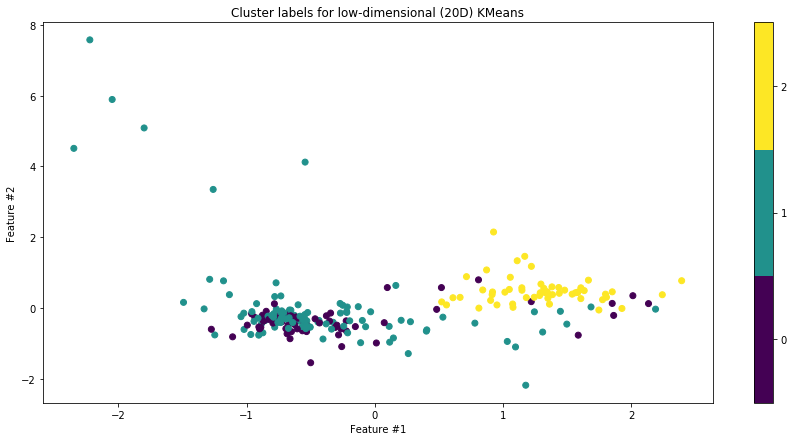

In [104]:
# As it can be seen, the "elbow" is found at k = 3 as the optimal number of clusters.

X = pca_df

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
upper_scaled_data = scaler.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=20)

X_reduced = pca.fit_transform(X)

scaled_data = scaler.fit_transform(X_reduced)

from sklearn.cluster import KMeans
kmeans_high = KMeans(n_clusters=3, random_state=0)
kmeans_high.fit(upper_scaled_data)
y_pred_high = kmeans_high.predict(upper_scaled_data)

kmeans_low = KMeans(n_clusters=3, random_state=0)
kmeans_low.fit(scaled_data)
y_pred_low = kmeans_low.predict(scaled_data)

# Plot 2 scatter plots -- two for high and low dimensional clustering results and one indicating the ground truth labels

plt.figure(figsize = (15,7))
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=y_pred_high, cmap = plt.cm.get_cmap('viridis',3))
plt.colorbar(ticks=[0,1,2])
plt.clim(-0.5,2.5)
plt.xlabel("Feature #1")
plt.ylabel("Feature #2")
plt.title("Cluster labels for high-dimensional (79D) KMeans")

plt.figure(figsize = (15,7))
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=y_pred_low, cmap = plt.cm.get_cmap('viridis',3))
plt.colorbar(ticks=[0,1,2])
plt.clim(-0.5,2.5)
plt.xlabel("Feature #1")
plt.ylabel("Feature #2")
plt.title("Cluster labels for low-dimensional (20D) KMeans")


So the clustering in raw and PCA-reduced data is close! There is some difference in categorizing points at the boundary
of the yellow and purple clusters, but overall it is quite similar.

# Training and Testing

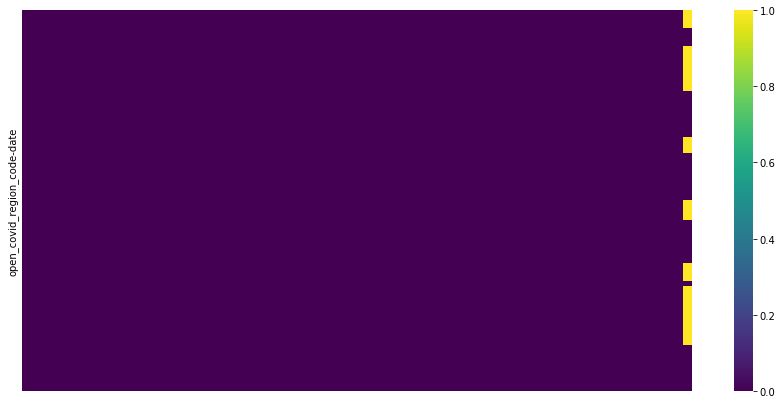

In [105]:
#repopulating the left_df with filled data!
left_df = pd.concat([pca_df,left_df['hospitalized_new']],axis=1)
plt.figure(figsize = (15,7))
sns.heatmap(data = left_df.isnull(),xticklabels = False, yticklabels = False, cmap = 'viridis')

In [106]:
reduced_df = pd.DataFrame(data = X_reduced, columns = [x for x in range(1,X_reduced.shape[1]+1)], index = left_df.index)
reduced_df = pd.concat([reduced_df,left_df['hospitalized_new']],axis=1)
reduced_df.head()

1         2         3         4  \
open_covid_region_code date                                                 
US-AK                  2020-01-06  0.876927  0.107680 -1.028335  0.337604   
                       2020-01-13  0.955818  0.352240 -0.731841  0.555381   
                       2020-01-20  1.320507  0.615529 -0.860767  0.519975   
                       2020-01-27  1.417110  0.261984 -0.694656  0.591915   
                       2020-02-03  2.251042  0.699311 -0.615163  0.418333   

                                          5         6         7         8  \
open_covid_region_code date                                                 
US-AK                  2020-01-06 -0.360661 -0.140178  0.837230 -0.056340   
                       2020-01-13 -0.834378 -0.079586  1.112797 -0.387405   
                       2020-01-20 -0.578833 -0.195849  0.897134  0.337104   
                       2020-01-27 -0.210503  0.083277  0.718960 -0.455038   
                       2020-02-03 -0.818109  0.028578  0.131537 -0.040633   

                                          9        10        11        12  \
open_covid_region_code date                                                 
US-AK                  2020-01-06  0.444778  0.790545 -0.025472 -0.438050   
                       2020-01-13  0.172287 -0.048416  1.022390 -0.778402   
                       2020-01-20  0.302281  0.303827  0.456714  0.190210   
                       2020-01-27  0.182442  0.461454  0.208095 -0.293865   
                       2020-02-03  0.431736  0.389981 -0.501713  0.347304   

                                         13        14        15        16  \
open_covid_region_code date                                                 
US-AK                  2020-01-06  0.126684  0.042558 -0.087578  0.033289   
                       2020-01-13  1.257825 -0.014042 -0.174729 -0.123421   
                       2020-01-20  0.479436  0.345399 -0.359735 -0.277370   
                       2020-01-27 -0.570196 -0.235077  0.524712  0.055677   
                       2020-02-03 -0.499706  0.452352  0.183224 -0.566069   

                                         17        18        19        20  \
open_covid_region_code date                                                 
US-AK                  2020-01-06  0.091773 -0.449702 -0.139734 -0.155570   
                       2020-01-13 -0.128648  0.222410 -0.439955 -0.014875   
                       2020-01-20 -0.169952  0.043084  0.052714 -0.277304   
                       2020-01-27  0.233621 -0.051597  0.559566  0.082140   
                       2020-02-03 -0.075018 -0.224079  0.093366 -0.195541   

                                   hospitalized_new  
open_covid_region_code date                          
US-AK                  2020-01-06 NaN                
                       2020-01-13 NaN                
                       2020-01-20 NaN                
                       2020-01-27 NaN                
                       2020-02-03 NaN

In [158]:
# Run this cell FOR TRAINING ON PCA DF

# All the unknown values of target variable is put into a new dataframe called testing_df. 
# We don't know the true label to compare
testing_df = reduced_df[reduced_df['hospitalized_new'].isnull()]

# Meanwhile, for the known values of the target variable, it is assigned into a new df called tv_df for 
# "train-validation" dataframe
tv_df = reduced_df[reduced_df['hospitalized_new'].notna()]

print(testing_df.shape)
print(tv_df.shape)

(108, 21)
(126, 21)


In [188]:
print(tv_df.index.get_level_values(0).value_counts())
# No point of having 3 samples in US-VT! So remove it
tv_df = tv_df.drop(tv_df.index.get_level_values(0).unique()[4])

US-ND    29
US-MT    28
US-WY    28
US-SD    27
US-AK    11
US-VT    3 
Name: open_covid_region_code, dtype: int64


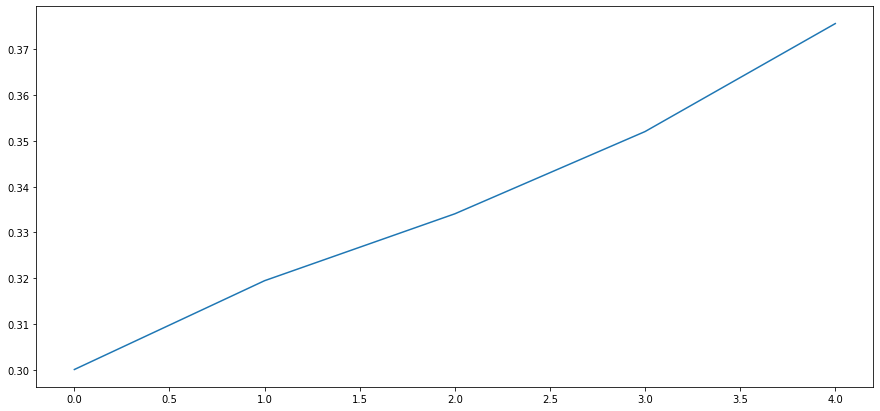

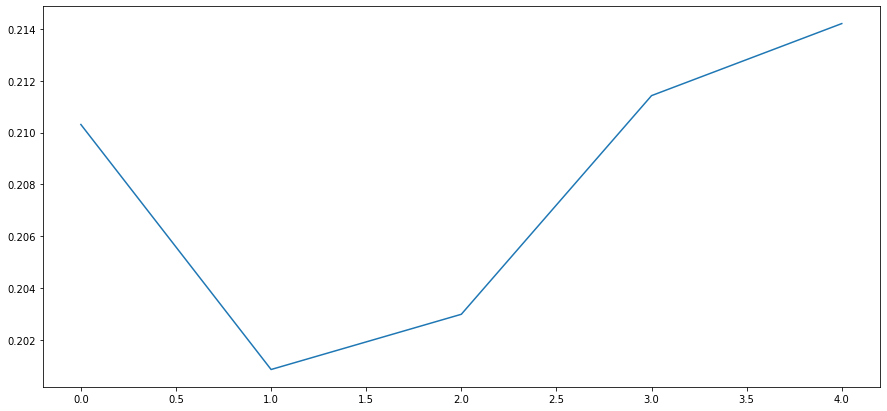

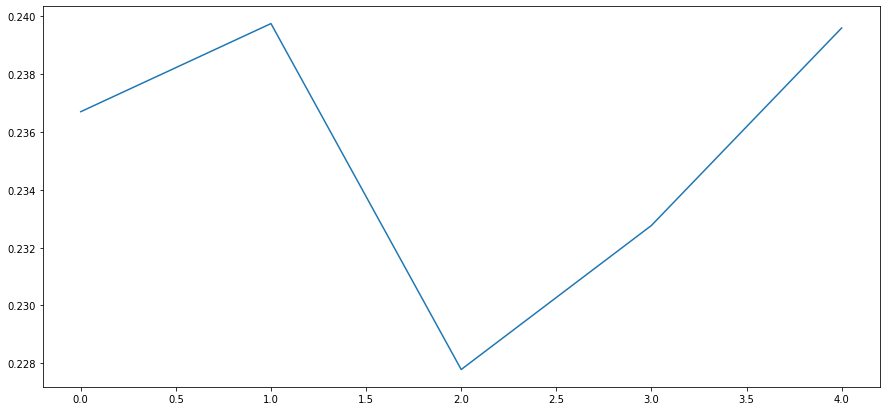

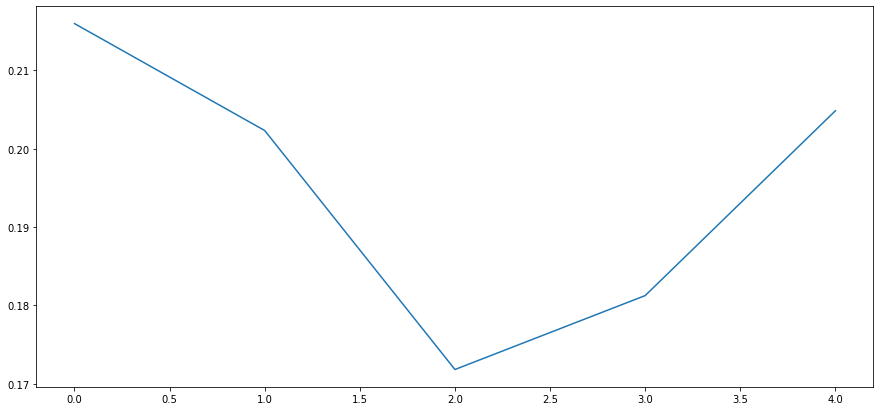

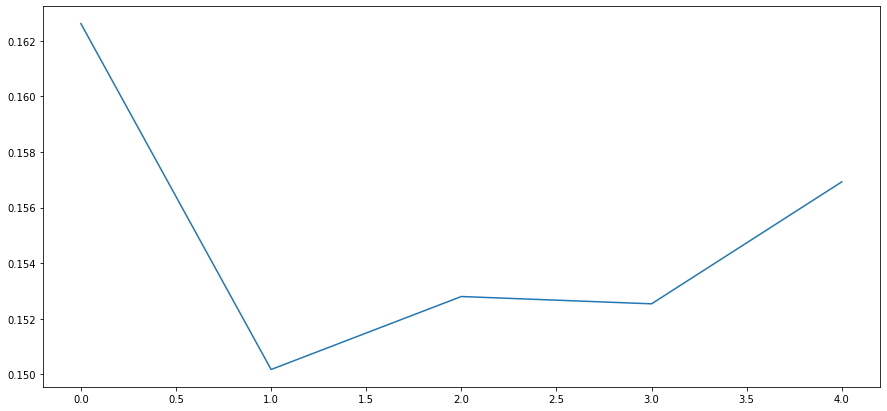

In [189]:
# This cell gets the time lag of the (PCA-reduced) features by finding the maximum correlation of the features to the target 
# variable. In an intuitive sense, if there is a surge in interest of search trends in a symptom, and that surge correlates
# to an increase in hospitalized cases 1,2,3, or 4 weeks later, we WANT to represent that. 

# It is important to get that maximum correlation (per region, as information may spread differently in each region) and then
# introduce a timelag. It makes our model more robust and a bit more intuitive.

primaryindex = tv_df.index.get_level_values(0).unique()
State_df = []

for i in range(len(primaryindex)):
    
    State_df.append(tv_df.loc[primaryindex[i]])
    
    
    weeklag = []
    plotx = []
    count = 0
    
    while count < 5:

        if count != 0:
            State_target = State_df[i]['hospitalized_new']
            State_target = State_target[1:]
            State_df[i].drop(State_df[i].tail(1).index,inplace=True)
            data = State_df[i].values
            index = State_df[i].index
            columns = State_df[i].columns

            weeklag.append(pd.DataFrame(data = data, index = index, columns = columns))
            plotx.append(np.mean(weeklag[count].corr().abs()['hospitalized_new'][:-1]))

        else:
            data = State_df[i].values
            index = State_df[i].index
            columns = State_df[i].columns
            weeklag.append(pd.DataFrame(data = data, index = index, columns = columns))
            plotx.append(np.mean(weeklag[count].corr().abs()['hospitalized_new'][:-1]))

        count += 1
        
    plt.figure(figsize=(15,7))
    plt.plot(plotx)
    
    State_df.pop()
    State_df.append(weeklag[np.argmax(plotx)])

In [190]:
for i in range(len(primaryindex)):
    
    multiindexcol = np.array([primaryindex[i] for x in range(len(State_df[i].index))])
    State_df[i]['open_covid_region_code'] = multiindexcol
    State_df[i] = State_df[i].set_index(['open_covid_region_code',State_df[i].index])

frames = []
for i in range(len(primaryindex)):
    frames.append(State_df[i])
timelagged_df = pd.concat(frames)

tv_df = timelagged_df
tv_df.head()

symptom:Adrenal crisis  symptom:Amenorrhea  \
open_covid_region_code date                                                     
US-AK                  2020-03-23  0.123992               -0.039315             
                       2020-03-30 -0.096774               -0.140121             
                       2020-04-06  0.016129                0.088710             
                       2020-04-13 -0.370968               -0.199597             
                       2020-04-20 -0.254032                0.199597             

                                   symptom:Anosmia  symptom:Asphyxia  \
open_covid_region_code date                                            
US-AK                  2020-03-23  3.553427        -0.053427           
                       2020-03-30  0.920363         0.203629           
                       2020-04-06 -0.317540        -0.027218           
                       2020-04-13  0.072581         0.058468           
                       2020-04-20 -0.255183        -0.078629           

                                   symptom:Atheroma  \
open_covid_region_code date                           
US-AK                  2020-03-23  0.153226           
                       2020-03-30 -0.239919           
                       2020-04-06  0.161290           
                       2020-04-13 -0.128024           
                       2020-04-20  0.316532           

                                   symptom:Auditory hallucination  \
open_covid_region_code date                                         
US-AK                  2020-03-23 -0.349798                         
                       2020-03-30 -0.340726                         
                       2020-04-06 -0.168529                         
                       2020-04-13 -0.042339                         
                       2020-04-20 -0.005040                         

                                   symptom:Balance disorder  \
open_covid_region_code date                                   
US-AK                  2020-03-23  0.005040                   
                       2020-03-30  0.103831                   
                       2020-04-06  0.088710                   
                       2020-04-13 -0.113911                   
                       2020-04-20  0.199597                   

                                   symptom:Beau's lines  symptom:Cataplexy  \
open_covid_region_code date                                                  
US-AK                  2020-03-23  0.123992              0.153226            
                       2020-03-30  0.261089              0.246976            
                       2020-04-06 -0.027218              0.057616            
                       2020-04-13  0.186492             -0.028226            
                       2020-04-20  0.097782             -0.224798            

                                   symptom:Chorea  \
open_covid_region_code date                         
US-AK                  2020-03-23  0.611895         
                       2020-03-30  0.175403         
                       2020-04-06  0.597782         
                       2020-04-13  0.086694         
                       2020-04-20 -0.121976         

                                   symptom:Cleft lip and cleft palate  \
open_covid_region_code date                                             
US-AK                  2020-03-23  0.093750                             
                       2020-03-30  0.003024                             
                       2020-04-06  0.016129                             
                       2020-04-13 -0.056452                             
                       2020-04-20  0.316532                             

                                   symptom:Clouding of consciousness  \
open_covid_region_code date                                            
US-AK                  2020-03-23 -0.269499                            
   

In [191]:
# Initalize to store final data
PCA_RMSE = []
PCA_SD = []
RAW_RMSE = []
RAW_SD = []

## KNN and Decision Tree on PCA Data

In [192]:
# KNN on PCA DF, split by region
from sklearn.model_selection import GroupKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error 

# Revert back to single index, so indexing can be used to access split data
# Store in new dataframe so tv_df can be used in later sections
tv_df2 = tv_df.reset_index(level=[0,1]) 

groups = tv_df2['open_covid_region_code']

# Drop all except Search Trends data
X = tv_df2.drop(columns=['hospitalized_new', 'open_covid_region_code', 'date'])
y = tv_df2['hospitalized_new']

# Split data
region_splits = GroupKFold(n_splits=5).split(X, y, groups) 

K_values = range(1,25)

# Validation error (MSE)   
all_rmse = np.zeros((len(K_values), 5))

# KNN
split_num = 0
for train_index, test_index in region_splits:
    for k in K_values:
        KNN = KNeighborsClassifier(n_neighbors=k)
        KNN.fit(X.loc[train_index, :], y.loc[train_index])
       
        # Calculate validation error using MSE        
        rmse = np.sqrt(mean_squared_error(y.loc[test_index], KNN.predict(X.loc[test_index, :])))
        all_rmse[k-1][split_num] = rmse

    split_num +=1

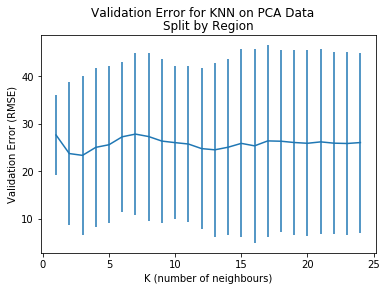

In [193]:
# Plot validation errors to find best k-value
plt.errorbar(K_values, np.mean(all_rmse, axis=1), np.std(all_rmse, axis=1))
plt.xlabel('K (number of neighbours)')
plt.ylabel('Validation Error (RMSE)')
plt.suptitle('Validation Error for KNN on PCA Data')
plt.title('Split by Region')
plt.show()

The MSE validation error is generally bad for all values of K, with large standard deviation for all values as well. However, we can see a slight dip in the validation error (at K = 16 and K = 22) -> Now it's K = 2.

In [194]:
PCA_RMSE.append(np.mean(all_rmse, axis=1)[1])
PCA_SD.append(np.std(all_rmse, axis=1)[1])
print('Validation Error for KNN using PCA data, split by region:', end = ' ')
print(round(np.mean(all_rmse, axis=1)[1], 2))

Validation Error for KNN using PCA data, split by region: 23.73


In [195]:
# KNN on PCA DF, split by date
# We will now run KNN on the PCA data again, but this time splitting based on date

# Split into training and validation sets
validation_df = tv_df2.loc[tv_df2['date'] > '2020-08-10']
training_df = tv_df2.loc[tv_df2['date'] <= '2020-08-10']

print(validation_df.shape)
print(training_df.shape)

(23, 82)
(91, 82)


In [196]:
# Drop unnecessary columns, split into X and Y
X_train = training_df.drop(columns=['hospitalized_new', 'open_covid_region_code', 'date'])
y_train = training_df['hospitalized_new']
X_val = validation_df.drop(columns=['hospitalized_new', 'open_covid_region_code', 'date'])
y_val = validation_df['hospitalized_new']

K_values = range(1,25)
val_err = np.zeros(len(K_values))


# KNN
for k in K_values:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
       
    # Calculate validation error using MSE        
    rmse = np.sqrt(mean_squared_error(y_val, KNN.predict(X_val)))
    val_err[k-1]= rmse

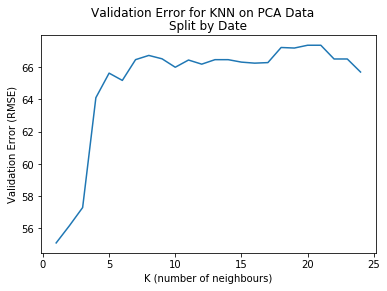

In [197]:
# Plot K values 
plt.plot(K_values, val_err)
plt.xlabel('K (number of neighbours)')
plt.ylabel('Validation Error (RMSE)')
plt.suptitle('Validation Error for KNN on PCA Data')
plt.title('Split by Date')
plt.show()

As with KNN split by region, in KNN split by date we get an optimal validation error at (K = 16) -> Now K = 3. 

In [198]:
# Find avg. RMSE for ideal K value K = 3
error = np.zeros(100)
for i in range(100):
    KNN = KNeighborsClassifier(3)
    KNN.fit(X_train, y_train)
    rmse = np.sqrt(mean_squared_error(y_val, KNN.predict(X_val)))
    error[i] = rmse
    
PCA_RMSE.append(np.mean(error))
PCA_SD.append(np.std(error))

print('Validation Error for KNN using PCA data, split by date:', end = ' ')
print(np.mean(error))

Validation Error for KNN using PCA data, split by date: 57.294813484066026


In [199]:
# Decision Tree on PCA data, split by region
from sklearn import tree 

groups = tv_df2['open_covid_region_code']

# Drop all except Search Trends data
X = tv_df2.drop(columns=['hospitalized_new', 'open_covid_region_code', 'date'])
y = tv_df2['hospitalized_new']

# Split data
region_splits = GroupKFold(n_splits=5).split(X, y, groups) 

val_err = np.zeros(5)
split_num = 0

# Decision Tree
for train_index, test_index in region_splits:
    X_train = X.loc[train_index, :]
    y_train = y.loc[train_index]
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)
    
    # Calculate Validation Error
    X_val = X.loc[test_index, :]
    y_val = y.loc[test_index]
    rmse = np.sqrt(mean_squared_error(y_val, clf.predict(X_val)))
    val_err[split_num] = rmse
    
    split_num += 1

In [200]:
PCA_RMSE.append(np.mean(val_err))
PCA_SD.append(np.std(val_err))

print('Validation Error for Decision Tree using PCA data, split by region:', end = ' ')
print(round(np.mean(val_err), 2))

Validation Error for Decision Tree using PCA data, split by region: 42.2


In [201]:
# Decision Tree on PCA data, split by date

# Split into training and validation sets
validation_df = tv_df2.loc[tv_df2['date'] > '2020-08-10']
training_df = tv_df2.loc[tv_df2['date'] <= '2020-08-10']

X_train = training_df.drop(columns=['hospitalized_new', 'open_covid_region_code', 'date'])
y_train = training_df['hospitalized_new']
X_val = validation_df.drop(columns=['hospitalized_new', 'open_covid_region_code', 'date'])
y_val = validation_df['hospitalized_new']

val_errors = np.zeros(1000)

# Decision Tree
for i in range(1000):
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)

    rmse = np.sqrt(mean_squared_error(y_val, clf.predict(X_val)))
    val_errors[i] = rmse

PCA_RMSE.append(np.mean(val_errors))
PCA_SD.append(np.std(val_errors))

print('Validation Error for Decision Tree using PCA data, split by date:', end = ' ')
print(round(np.mean(val_errors), 2))

Validation Error for Decision Tree using PCA data, split by date: 62.84


## KNN and Decision Tree on Raw Data

In [204]:
# Classifying using RAW DF
# All the unknown values of target variable is put into a new dataframe called testing_df. 
# We don't know the true label to compare
testing_df = left_df[left_df['hospitalized_new'].isnull()]

# Meanwhile, for the known values of the target variable, it is assigned into a new df called tv_df for 
# "train-validation" dataframe
tv_df = left_df[left_df['hospitalized_new'].notna()]

print(testing_df.shape)
print(tv_df.shape)

(108, 80)
(126, 80)


In [205]:
print(tv_df.index.get_level_values(0).value_counts())
# No point of having 3 samples in US-VT! So remove it
tv_df = tv_df.drop(tv_df.index.get_level_values(0).unique()[4])

US-ND    29
US-MT    28
US-WY    28
US-SD    27
US-AK    11
US-VT    3 
Name: open_covid_region_code, dtype: int64


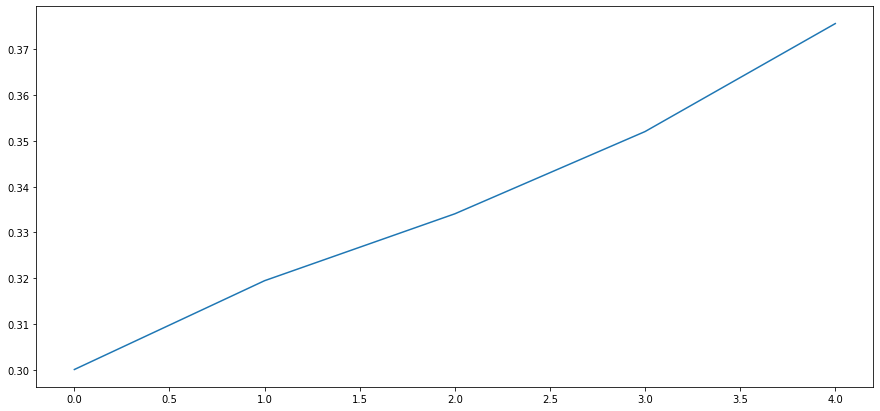

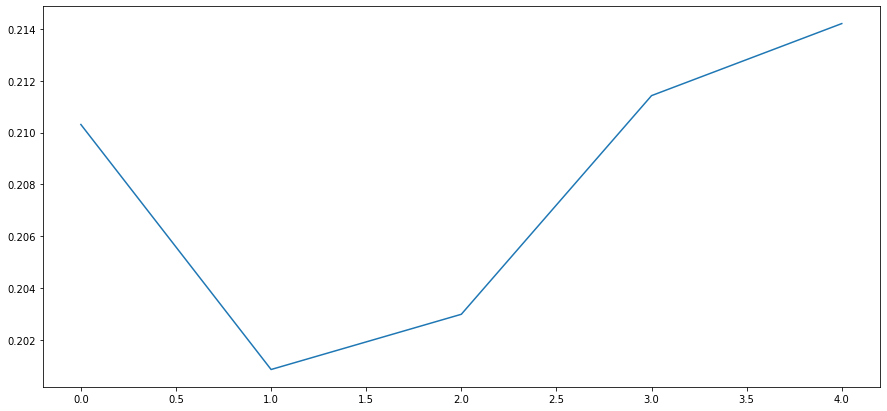

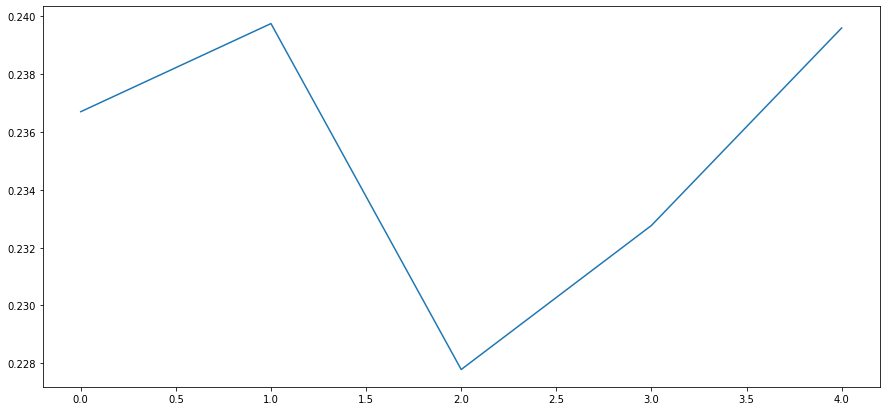

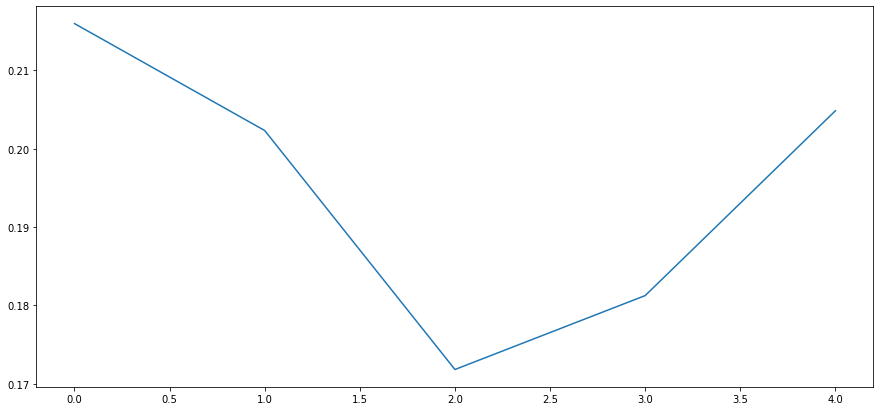

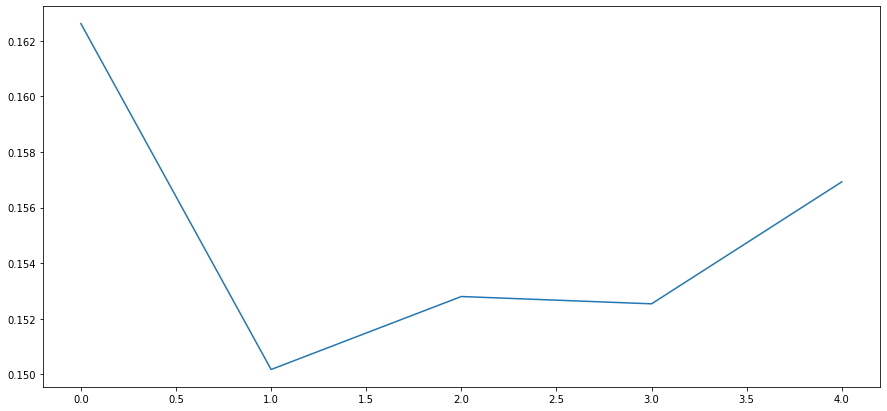

In [206]:
# This cell gets the time lag of the (PCA-reduced) features by finding the maximum correlation of the features to the target 
# variable. In an intuitive sense, if there is a surge in interest of search trends in a symptom, and that surge correlates
# to an increase in hospitalized cases 1,2,3, or 4 weeks later, we WANT to represent that. 

# It is important to get that maximum correlation (per region, as information may spread differently in each region) and then
# introduce a timelag. It makes our model more robust and a bit more intuitive.

primaryindex = tv_df.index.get_level_values(0).unique()
State_df = []

for i in range(len(primaryindex)):
    
    State_df.append(tv_df.loc[primaryindex[i]])
    
    
    weeklag = []
    plotx = []
    count = 0
    
    while count < 5:

        if count != 0:
            State_target = State_df[i]['hospitalized_new']
            State_target = State_target[1:]
            State_df[i].drop(State_df[i].tail(1).index,inplace=True)
            data = State_df[i].values
            index = State_df[i].index
            columns = State_df[i].columns

            weeklag.append(pd.DataFrame(data = data, index = index, columns = columns))
            plotx.append(np.mean(weeklag[count].corr().abs()['hospitalized_new'][:-1]))

        else:
            data = State_df[i].values
            index = State_df[i].index
            columns = State_df[i].columns
            weeklag.append(pd.DataFrame(data = data, index = index, columns = columns))
            plotx.append(np.mean(weeklag[count].corr().abs()['hospitalized_new'][:-1]))

        count += 1
        
    plt.figure(figsize=(15,7))
    plt.plot(plotx)
    
    State_df.pop()
    State_df.append(weeklag[np.argmax(plotx)])

In [207]:
for i in range(len(primaryindex)):
    
    multiindexcol = np.array([primaryindex[i] for x in range(len(State_df[i].index))])
    State_df[i]['open_covid_region_code'] = multiindexcol
    State_df[i] = State_df[i].set_index(['open_covid_region_code',State_df[i].index])

frames = []
for i in range(len(primaryindex)):
    frames.append(State_df[i])
timelagged_df = pd.concat(frames)

tv_df = timelagged_df
tv_df.head()

symptom:Adrenal crisis  symptom:Amenorrhea  \
open_covid_region_code date                                                     
US-AK                  2020-03-23  0.123992               -0.039315             
                       2020-03-30 -0.096774               -0.140121             
                       2020-04-06  0.016129                0.088710             
                       2020-04-13 -0.370968               -0.199597             
                       2020-04-20 -0.254032                0.199597             

                                   symptom:Anosmia  symptom:Asphyxia  \
open_covid_region_code date                                            
US-AK                  2020-03-23  3.553427        -0.053427           
                       2020-03-30  0.920363         0.203629           
                       2020-04-06 -0.317540        -0.027218           
                       2020-04-13  0.072581         0.058468           
                       2020-04-20 -0.255183        -0.078629           

                                   symptom:Atheroma  \
open_covid_region_code date                           
US-AK                  2020-03-23  0.153226           
                       2020-03-30 -0.239919           
                       2020-04-06  0.161290           
                       2020-04-13 -0.128024           
                       2020-04-20  0.316532           

                                   symptom:Auditory hallucination  \
open_covid_region_code date                                         
US-AK                  2020-03-23 -0.349798                         
                       2020-03-30 -0.340726                         
                       2020-04-06 -0.168529                         
                       2020-04-13 -0.042339                         
                       2020-04-20 -0.005040                         

                                   symptom:Balance disorder  \
open_covid_region_code date                                   
US-AK                  2020-03-23  0.005040                   
                       2020-03-30  0.103831                   
                       2020-04-06  0.088710                   
                       2020-04-13 -0.113911                   
                       2020-04-20  0.199597                   

                                   symptom:Beau's lines  symptom:Cataplexy  \
open_covid_region_code date                                                  
US-AK                  2020-03-23  0.123992              0.153226            
                       2020-03-30  0.261089              0.246976            
                       2020-04-06 -0.027218              0.057616            
                       2020-04-13  0.186492             -0.028226            
                       2020-04-20  0.097782             -0.224798            

                                   symptom:Chorea  \
open_covid_region_code date                         
US-AK                  2020-03-23  0.611895         
                       2020-03-30  0.175403         
                       2020-04-06  0.597782         
                       2020-04-13  0.086694         
                       2020-04-20 -0.121976         

                                   symptom:Cleft lip and cleft palate  \
open_covid_region_code date                                             
US-AK                  2020-03-23  0.093750                             
                       2020-03-30  0.003024                             
                       2020-04-06  0.016129                             
                       2020-04-13 -0.056452                             
                       2020-04-20  0.316532                             

                                   symptom:Clouding of consciousness  \
open_covid_region_code date                                            
US-AK                  2020-03-23 -0.269499                            
   

In [208]:
# KNN on RAW DF, split by region
# Revert back to single index, so indexing can be used to access split data
# Store in new dataframe so tv_df can be used in later sections
tv_df2 = tv_df.reset_index(level=[0,1]) 

groups = tv_df2['open_covid_region_code']

# Df with only inputs
X = tv_df2.drop(columns=['hospitalized_new', 'open_covid_region_code', 'date'])
# Separate target values
y = tv_df2['hospitalized_new']

# Split data
splits = GroupKFold(n_splits=5).split(X, y, groups) 

K_values = range(1,25)

# Validation error (MSE)   
all_rmse = np.zeros((len(K_values), 5))

# KNN
split_num = 0
for train_index, test_index in splits:
    for k in K_values:
        KNN = KNeighborsClassifier(n_neighbors=k)
        KNN.fit(X.loc[train_index, :], y.loc[train_index])
       
        # Calculate validation error using MSE        
        rmse = np.sqrt(mean_squared_error(y.loc[test_index], KNN.predict(X.loc[test_index, :])))
        all_rmse[k-1][split_num] = rmse

    split_num +=1

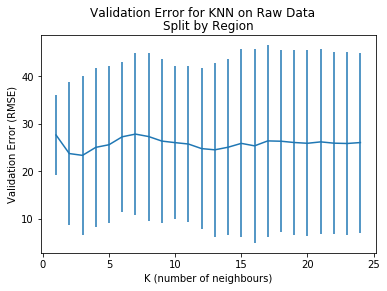

In [209]:
# Plot validation errors to find best k-value
plt.errorbar(K_values, np.mean(all_rmse, axis=1), np.std(all_rmse, axis=1))
plt.xlabel('K (number of neighbours)')
plt.ylabel('Validation Error (RMSE)')
plt.suptitle('Validation Error for KNN on Raw Data')
plt.title('Split by Region')
plt.show()

(We can see that unfortunately the validation error does not change much for any value of K.) -> Now there is a min at K=2.

In [210]:
RAW_RMSE.append(np.mean(all_rmse, axis=1)[1])
RAW_SD.append(np.std(all_rmse, axis=1)[1])
print('Validation Error for KNN using RAW data, split by region:', end = ' ')
print(round(np.mean(all_rmse, axis=1)[1], 2))

Validation Error for KNN using RAW data, split by region: 23.73


In [211]:
# KNN on RAW DF, split on date
# We will now run KNN on the RAW data again, but this time splitting based on date

# Split into training and validation sets
validation_df = tv_df2.loc[tv_df2['date'] > '2020-08-10']
training_df = tv_df2.loc[tv_df2['date'] <= '2020-08-10']

print(validation_df.shape)
print(training_df.shape)

(23, 82)
(91, 82)


In [212]:
# Drop unnecessary columns, split into X and Y
X_train = training_df.drop(columns=['hospitalized_new', 'open_covid_region_code', 'date']) 
y_train = training_df['hospitalized_new']

X_val = validation_df.drop(columns=['hospitalized_new', 'open_covid_region_code', 'date']) 
y_val = validation_df['hospitalized_new']

# KNN
K_values = range(1,25)
val_err = np.zeros(len(K_values))

for k in K_values:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
       
    # Calculate validation error using MSE        
    rmse = np.sqrt(mean_squared_error(y_val, KNN.predict(X_val)))
    val_err[k-1]= rmse

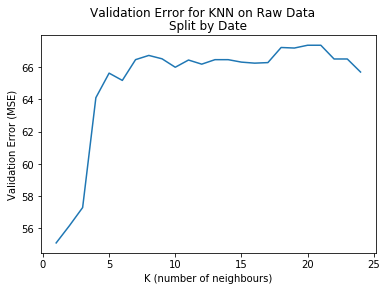

In [213]:
# Plot K values 
plt.plot(K_values, val_err)
plt.xlabel('K (number of neighbours)')
plt.ylabel('Validation Error (MSE)')
plt.suptitle('Validation Error for KNN on Raw Data')
plt.title('Split by Date')
plt.show()

We can see that the validation error (MSE) is minimal around (K = 11 and K = 17) -> Now K = 3 I guess? 

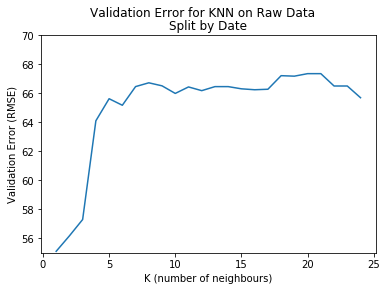

In [215]:
# Plot K values again, with smaller y-axis limit 
plt.plot(K_values, val_err)
plt.xlabel('K (number of neighbours)')
plt.ylabel('Validation Error (RMSE)')
plt.suptitle('Validation Error for KNN on Raw Data')
plt.title('Split by Date')
plt.ylim(55, 70)
plt.show()

Plotting again with a smaller y-axis range, we can see that the minimum Validation Error (MSE) occurs when (K = 11) -> K=3?

In [216]:
# Find avg. RMSE for ideal K value (K = 11) K=3??
error = np.zeros(100)
for i in range(100):
    KNN = KNeighborsClassifier(3)
    KNN.fit(X_train, y_train)
    rmse = np.sqrt(mean_squared_error(y_val, KNN.predict(X_val)))
    error[i] = rmse
    
RAW_RMSE.append(np.mean(error))
RAW_SD.append(np.std(error)) 

In [217]:
# Decision Tree on RAW DF, split by region

# Df with only inputs
X = tv_df2.drop(columns=['hospitalized_new', 'open_covid_region_code', 'date'])
# Separate target values
y = tv_df2['hospitalized_new']

groups = tv_df2['open_covid_region_code']

# Split data
region_splits = GroupKFold(n_splits=5).split(X, y, groups) 

val_err = np.zeros(5)
split_num = 0

# Decision Tree
for train_index, test_index in region_splits:
    X_train = X.loc[train_index, :]
    y_train = y.loc[train_index]
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)
    
    # Calculate Validation Error
    X_val = X.loc[test_index, :]
    y_val = y.loc[test_index]
    rmse = np.sqrt(mean_squared_error(y_val, clf.predict(X_val)))
    val_err[split_num] = rmse
    
    split_num += 1

In [218]:
RAW_RMSE.append(np.mean(val_err))
RAW_SD.append(np.std(val_err))

print('Validation Error for Decision Tree using RAW data, split by region:', end = ' ')
print(round(np.mean(val_err), 2))

Validation Error for Decision Tree using RAW data, split by region: 39.18


In [219]:
# Decision Tree on RAW DF, split by date
validation_df = tv_df2.loc[tv_df2['date'] > '2020-08-10']
training_df = tv_df2.loc[tv_df2['date'] <= '2020-08-10']

# Drop unnecessary columns, split into X and Y
X_train = training_df.drop(columns=['hospitalized_new', 'open_covid_region_code', 'date']) 
y_train = training_df['hospitalized_new']

X_val = validation_df.drop(columns=['hospitalized_new', 'open_covid_region_code', 'date']) 
y_val = validation_df['hospitalized_new']

# Decision Tree
val_errors = np.zeros(100)
for i in range(100):
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)

    rmse = np.sqrt(mean_squared_error(y_val, clf.predict(X_val)))
    val_errors[i] = rmse

RAW_RMSE.append(np.mean(val_errors))
RAW_SD.append(np.std(val_errors))  

print('Validation Error for Decision Tree using RAW data, split by date:', end = ' ')
print(round(np.mean(val_errors), 2))

Validation Error for Decision Tree using RAW data, split by date: 62.84


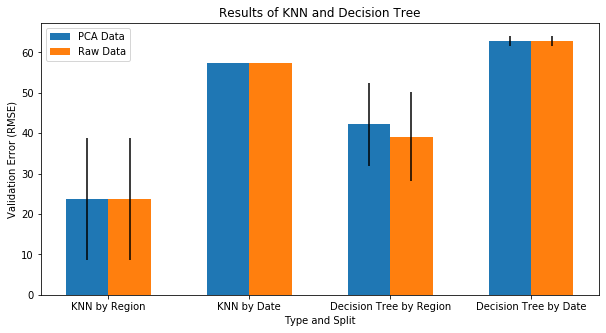

In [220]:
# Visualization for data

N = 4
ind = np.arange(N)
plt.figure(figsize=(10,5))
width = 0.3  

plt.bar(ind, PCA_RMSE , width, yerr = PCA_SD, label = 'PCA Data')
plt.bar(ind + width, RAW_RMSE, width, yerr = RAW_SD, label='Raw Data')

plt.xlabel('Type and Split')
plt.ylabel('Validation Error (RMSE)')
plt.title('Results of KNN and Decision Tree')

plt.xticks(ind + width / 2, ('KNN by Region', 'KNN by Date', 'Decision Tree by Region','Decision Tree by Date'))

plt.legend(loc='upper left')
plt.show()


# Part 3 Optional

For this optional part, we want to match the predictions given by KNN with another prediction method.

In [221]:
# LAST PART TO GO HERE!!

In [ ]:
primaryindex = tv_df.index.get_level_values(0).unique()
print(tv_df.index.get_level_values(0).value_counts())
primaryindex

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

totalrmse = []
totalresiduals = []
ymax = []

for i in range(len(primaryindex)):
    
    rmse = []
    residuals = []
    
    for random in range(3):
        
        region_df = tv_df.loc[primaryindex[i]]
        
        X = region_df.drop('hospitalized_new',axis=1).values
        y = region_df['hospitalized_new'].values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=random)
        
        dtree = DecisionTreeClassifier()
        dtree.fit(X_train,y_train)
        predictions = dtree.predict(X_test)
        residuals.append(predictions-y_test)
        rmse.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    
    totalrmse.append(np.array(rmse).mean())
    totalresiduals.append(abs(np.array(residuals)).mean())
    
    ymax.append(y.max())
    
    if i == 1:
        plt.scatter(y_test,predictions)
        print('RMSE:', np.array(rmse).mean())

In [ ]:
print(totalrmse)

In [ ]:
# Specify the values of blue bars (height)
N = len(totalresiduals)

blue_bar = totalresiduals
# Specify the values of orange bars (height)
orange_bar = ymax

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Residuals')
plt.bar(ind + width, orange_bar, width, label='Maximum y value')

plt.xlabel('open_covid_region_code')
plt.ylabel('hospitalized_new')
plt.title('Results of Decision Tree')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('US-AK', 'US-MT', 'US-ND','US-SD','US-WY'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [ ]:
totalrmse = []

for i in range(len(primaryindex)):
    
    rmse = []
    
    for random in range(3):
        
        region_df = tv_df.loc[primaryindex[i]]
        
        X = region_df.drop('hospitalized_new',axis=1).values
        y = region_df['hospitalized_new'].values

        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random)

        from sklearn.linear_model import LinearRegression
        lm = LinearRegression()
        lm.fit(X_train,y_train)
        predictions = lm.predict(X_test)

        rmse.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    
    totalrmse.append(np.array(rmse).mean())
    

    if i == 1:
        plt.scatter(y_test,predictions)
        print('RMSE:', np.array(rmse).mean())

In [ ]:
totalrmse

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))/np.ptp(y_test)